# Practice Problems
### Lecture 18

Rename the notebook with your lastName and the lecture 
    
    ex. Asefaw_18
    
Turn this notebook into triton-ed by the deadline


In this practice problem set you will recreate this figure below (almost) from Hull et al. (2011).

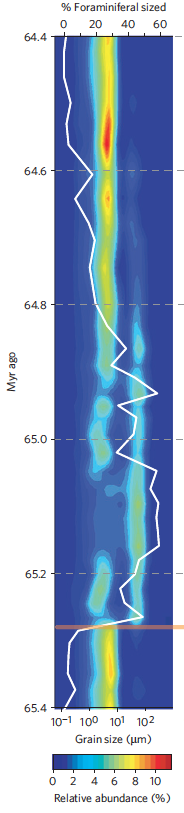

In [8]:
from IPython.display import Image
Image(filename='Figures/grainSize.png')

# 1. Heat map

Modify the code snippet below  from Lecture 18 to recreate a  heat map including the foraminiferal abundances as a white line superposed on the heatmap.  

- Hull et al. (2011) assumed that all grains larger than 16 $\mu$m were foraminifera. Calculate the percentagae of foraminiferal sized grains. To do this, you'll need to first filter the gs DataFrame for grain sizes larger than 16 $\mu$m. 
- Then, calculate the percentage of foraminiferal sized grains by first calculating the sum of all the grains and then calculting the sum of all the grains larger than 16 $\mu$m.  Hint: use axis=1 option of **df.sum()** to sum over the rows.
- Do the same for the sum over all grain sizes to get the total abundances of grains and get the percentages.
- To superpose the percentages on top of our figure, we need a method of the ax instance of the subplot module called **ax.twiny()** which uses the same y axis, but lets us re-define the x axis for our foram totals. Use the syntax: 

**fig,ax = plt.subplots() **

Set the sizes using the **fig.set_figheight(),fig.set_figwidth()** methods.  

and 
**ax1=ax.twiny()** 
for the superposed foram data plot.

- To finish things off, kill off both axis plot labels using
**ax.axis('off')** and **ax1.axis('off')**.







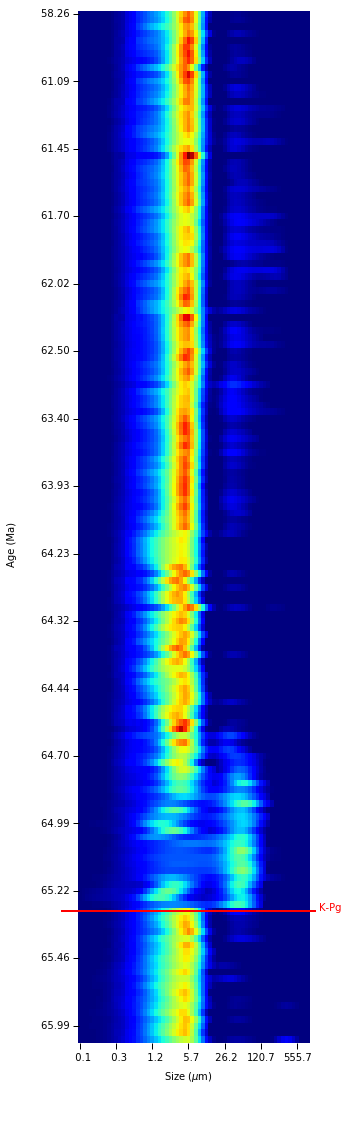

In [6]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as stats
from matplotlib import cm

plt.figure(1,(5,20)) # create the plot instance but this time use
# fig, ax objects

gs=pd.read_csv('Datasets/grainSize/Site1209-KPg-Grainsize.csv',header=0) # read into a DataFrame
gs.set_index(['size_um'],inplace=True) # move the column header 'size_um' to be the index. 
ages=gs.columns.tolist()
ages=[float(i) for i in ages] # make floating point
gs.columns=ages # reassign as column headers. 
ages=sorted(ages) # sort the age list
gs=gs.reindex_axis(ages,axis=1)  # reindex the ages 
gs=gs.T # takes the transpose of the DataFrame (swaps rows and columns)
sizes=gs.columns # the columns are now the sizes in microns. 
ytick_labels=[] # set up some lists for y tick labels
ytick_locs=[] # set up a list for the tick locations
for k in range(len(ages)): # step through the indices for age
    if k%10==0: # pick out every tenth one - remember the modulo function %
        ytick_locs.append(k) # append the tick mark index
        ytick_labels.append(ages[k]) # append the age
xs=np.ones(len(ytick_locs))*-1 # get a list of x values for the age tick marks
xtick_labels=[] # set up some lists for x labels and ticks
xtick_locs=[]
for k in range(len(sizes)): # step through the indices for grain size
    if k%10==0: # pick out every tenth one
        xtick_locs.append(k) # append the tick mark index
        xtick_labels.append(sizes[k]) # append the age
ys=np.ones(len(xtick_locs))*len(ages) # get a list of x values


plt.imshow(gs,aspect='auto',cmap=cm.jet) # make the plot

# now for the new stuff
plt.axis("off") # get rid of the axis 
plt.plot(xs,ytick_locs,'k_') # put on the y axis ticks as a column along the left side
for t in range(len(ytick_labels)): # put on the y tick labels
    # notice how they are scootched to the left
    plt.text(xs[t],ytick_locs[t],
        '%5.2f  '%(ytick_labels[t]),va='center',ha='right') 
plt.plot(xtick_locs,ys,'k|') # put on the x-axis ticks
for t in range(len(xtick_labels)): # put on the x axis labels
    plt.text(xtick_locs[t],ys[t]+1,
        '%5.1f'%(xtick_labels[t]),va='top',ha='center')
k=ages.index(65.28512048) # index closest to the K/Pg boundary
# taken as 65.28 Ma in this paper.  
plt.plot([-5,65],[k,k],'r-',linewidth=2) # put on a heavy red line
plt.text(66,k,'K-Pg',color='red') # put on a note in red. 
plt.text(xtick_locs[int(len(xtick_locs)/2)], 
         len(ages)+5,'Size ($\mu$m)',ha='center')# label the X axis
plt.text(-20,len(ages)/2,'Age (Ma)',rotation=90); # label the Y axis.; # make the plot with the jet color map